In [167]:
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from scipy.stats import norm, gaussian_kde
import KDEpy

In [168]:
data = pd.read_csv('data_KDE_1D.csv')
data

,data
0,4.945075
1,3.959293
2,5.653608
3,3.528821
4,4.189699
...,...
146,14.749228
147,14.671062
148,13.768554
149,15.386589


## a) Explore the data using suitable methods and tools.

Data Describe:
              data
count  151.000000
mean     9.913809
std      4.373194
min      2.557575
25%      5.250820
50%      9.952901
75%     14.527516
max     17.081593

Data Head:
        data
0  4.945075
1  3.959293
2  5.653608
3  3.528821
4  4.189699


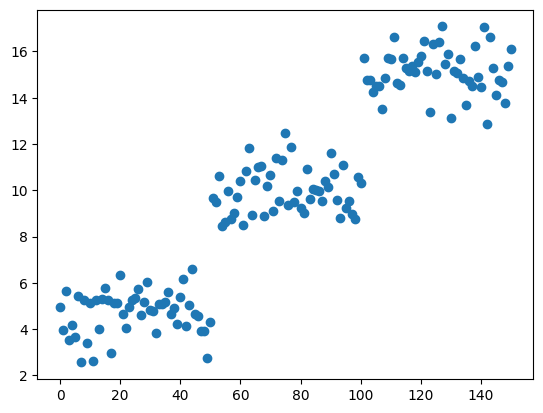

In [169]:
print("Data Describe:\r\n", data.describe())
print("\r\nData Head:\r\n", data.head())

xval = np.arange(len(data.index))
plt.scatter(xval, data.iloc[:,0])

## b) Group the data to generate a meaningful histogram of the data.

c:\users\fhs49456\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


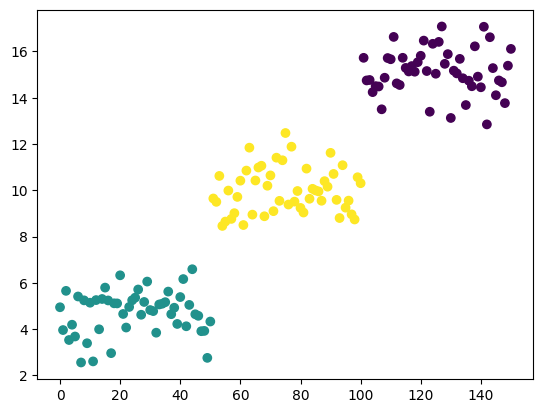

In [170]:
kmean = KMeans(3).fit(data)
labels = kmean.predict(data)
plt.scatter(xval, data.iloc[:,0], c=labels)

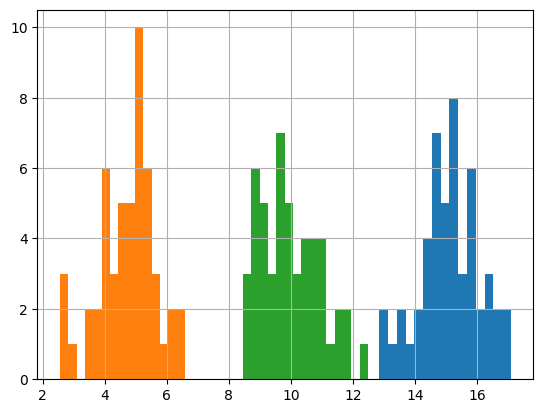

In [171]:
data_with_labels = data
data_with_labels["label"] = labels
data_with_labels.groupby('label')['data'].hist(bins=15)
plt.show()

## c) Try to fit a normal distribution into the data. Plot the fitted normal distribution on top of the histogram. Hint: use scipy.stats.norm.fit to estimate the parameters of the normal distribution.

In [172]:
# '#l, g = data.groupby('label')
# min = 0
# x=np.linspace(0,data.max(),1000)
# for label, group in data.groupby('label'):
#     location, scale = norm.fit(group)
#     print( location , " | " , scale)
#     pdf=norm.pdf(x,location+min,scale)
#     min += location
#     plt.plot(x,pdf*50)
#
#
# data.groupby('label')['data'].hist(bins=15)
# plt.show()
# # xmin, xmax = plt.xlim()
# # x = np.linspace(xmin, xmax, len(data))
# # p = norm.pdf(x, mu, std)
# # q = norm.pdf(x, mu1, std1)
# # plt.plot(x, p, 'k', linewidth=2)
# # plt.plot(x, q, 'r', linewidth=1)
# # title = "Fit results: mu = %.5f,  std = %.5f" % (mu, std)
# # plt.title(title)
#
# plt.show()'


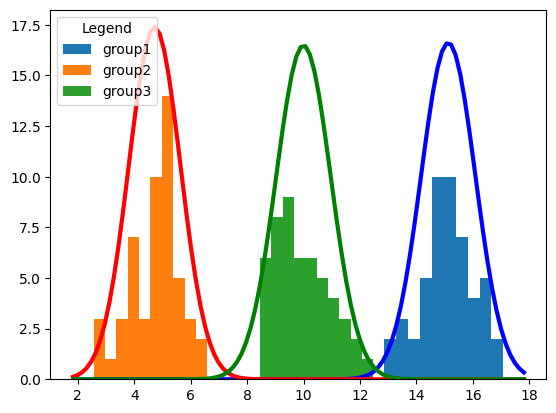

In [173]:
group1 = data.loc[data['label'] == 0, 'data']
group2 = data.loc[data['label'] == 1, 'data']
group3 = data.loc[data['label'] == 2, 'data']

mu1, std1 = norm.fit(group1)
mu2, std2 = norm.fit(group2)
mu3, std3 = norm.fit(group3)

plt.hist(group1, label='group1')
plt.hist(group2, label='group2')
plt.hist(group3, label='group3')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)

p1 = norm.pdf(x, mu1, std1)
plt.plot(x, p1*40, 'b', linewidth=3)
p2 = norm.pdf(x, mu2, std2)
plt.plot(x, p2*40, 'r', linewidth=3)
p3 = norm.pdf(x, mu3, std3)
plt.plot(x, p3*40, 'g', linewidth=3)

plt.legend(title='Legend', loc='upper left')
plt.show()

## d) Multivariate kernel density estimation: Put a kernel (Gaussian, box, triangular) on top of every data point. Discuss the results. Hint: you can use python libraries such as KDEpy for your solution.

https://kdepy.readthedocs.io/en/latest/introduction.html

In [174]:
data = pd.read_csv('data_KDE_1D.csv')
data_array = data['data'].to_numpy()

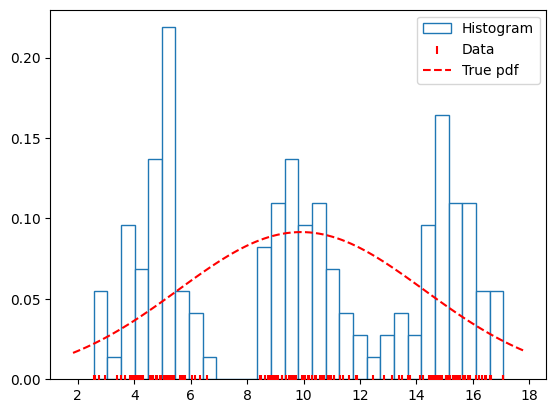

In [175]:
plt.hist(data, density=True, label='Histogram', edgecolor='#1f77b4', color='w', bins=30)

mu, std = norm.fit(data)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p1 = norm.pdf(x, mu, std)

plt.scatter(data, np.zeros_like(data), marker='|',
            c='r', label='Data', zorder=9)
plt.plot(x, p1, label='True pdf', c='r', ls='--')
plt.legend(loc='best')
plt.show()

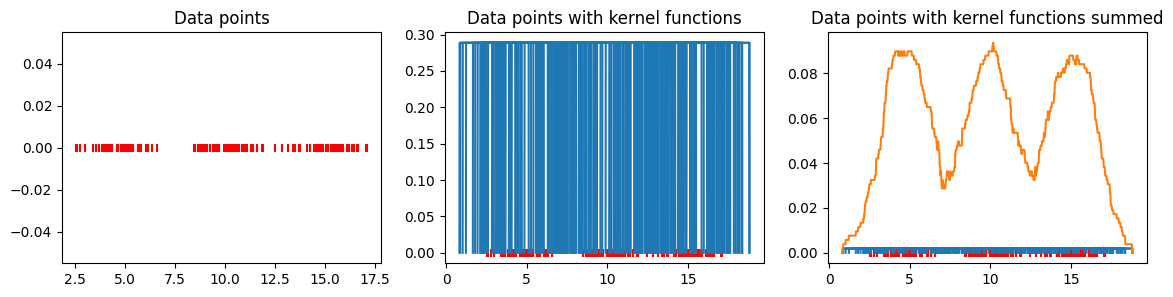

In [176]:
# Plot the points
plt.figure(figsize=(14, 3)); plt.subplot(1, 3, 1)
plt.title('Data points')
plt.scatter(data_array, np.zeros_like(data_array), marker='|', c='r', label='Data')

# Plot a kernel on each data point
plt.subplot(1, 3, 2); plt.title('Data points with kernel functions')
plt.scatter(data_array, np.zeros_like(data_array), marker='|', c='r', label='Data')
for d in data_array:
    x, y = KDEpy.TreeKDE(kernel='box').fit([d])()
    plt.plot(x, y, color='#1f77b4')

# Plot a normalized kernel on each data point, and the sum
plt.subplot(1, 3, 3); plt.title('Data points with kernel functions summed')
plt.scatter(data_array, np.zeros_like(data_array), marker='|', c='r', label='Data')
for d in data_array:
    x, y = KDEpy.TreeKDE(kernel='box').fit([d])()
    plt.plot(x, y / len(data), color='#1f77b4')
x, y = KDEpy.TreeKDE(kernel='box').fit(data_array)()
plt.plot(x, y, color='#ff7f0e')
plt.show()

Zoom in last one to see the single hats:

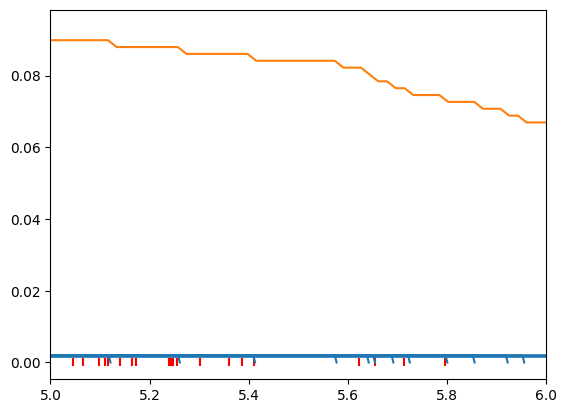

In [177]:
# Plot a normalized kernel on each data point, and the sum
plt.scatter(data_array, np.zeros_like(data_array), marker='|', c='r', label='Data')
for d in data_array:
    x, y = KDEpy.TreeKDE(kernel='box').fit([d])()
    plt.plot(x, y / len(data), color='#1f77b4')
x, y = KDEpy.TreeKDE(kernel='box').fit(data_array)()
plt.plot(x, y, color='#ff7f0e')
plt.xlim([5, 6])
plt.show()

## e) Vary the parameters of the kernels (bandwidth, weights, ...) used in (d) and combine them to get a KDE.

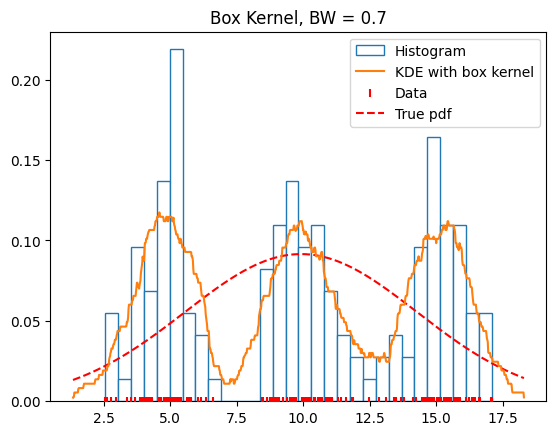

In [178]:
plt.hist(data_array, density=True, label='Histogram', edgecolor='#1f77b4', color='w', bins=30)

mu, std = norm.fit(data_array)
xmin, xmax = plt.xlim()

# Use a box function with the FFTKDE to obtain a density estimate
x, y = KDEpy.FFTKDE(kernel='box', bw=0.7).fit(data_array).evaluate()

p1 = norm.pdf(x, mu, std)
plt.plot(x, y, zorder=10, color='#ff7f0e', label='KDE with box kernel')
plt.scatter(data_array, np.zeros_like(data_array), marker='|', c='r',
            label='Data', zorder=9)
plt.plot(x, p1, label='True pdf', c='r', ls='--')
plt.legend(loc='best')
plt.title('Box Kernel, BW = 0.7')
plt.show()

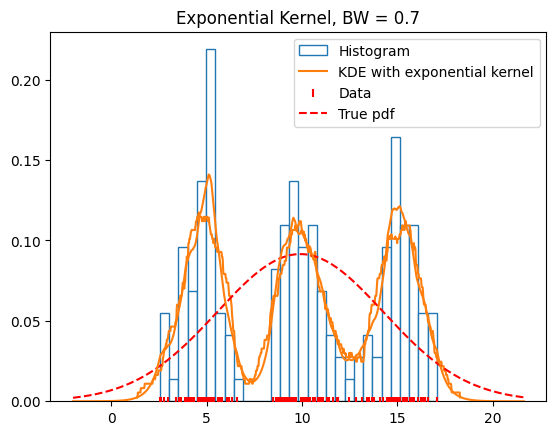

In [179]:
plt.plot(x, y, color='#ff7f0e')
plt.hist(data_array, density=True, label='Histogram', edgecolor='#1f77b4', color='w', bins=30)

mu, std = norm.fit(data_array)
xmin, xmax = plt.xlim()

# Use a box function with the FFTKDE to obtain a density estimate
x, y = KDEpy.FFTKDE(kernel='exponential', bw=0.7).fit(data_array).evaluate()

p1 = norm.pdf(x, mu, std)
plt.plot(x, y, zorder=10, color='#ff7f0e', label='KDE with exponential kernel')
plt.scatter(data_array, np.zeros_like(data_array), marker='|', c='r',
            label='Data', zorder=9)
plt.plot(x, p1, label='True pdf', c='r', ls='--')
plt.legend(loc='best')
plt.title('Exponential Kernel, BW = 0.7')
plt.show()

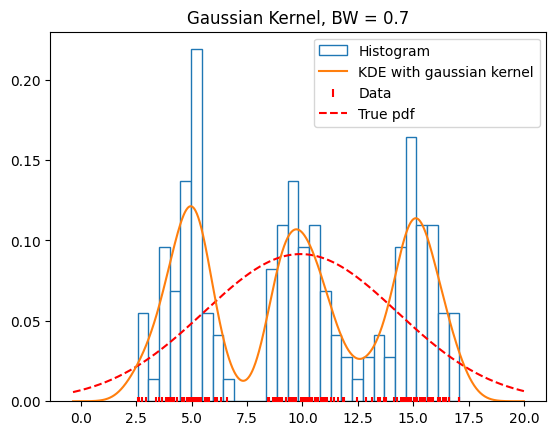

In [180]:
plt.hist(data_array, density=True, label='Histogram', edgecolor='#1f77b4', color='w', bins=30)

mu, std = norm.fit(data_array)
xmin, xmax = plt.xlim()

# Use a box function with the FFTKDE to obtain a density estimate
x, y = KDEpy.FFTKDE(kernel='gaussian', bw=0.7).fit(data_array).evaluate()

p1 = norm.pdf(x, mu, std)
plt.plot(x, y, zorder=10, color='#ff7f0e', label='KDE with gaussian kernel')
plt.scatter(data_array, np.zeros_like(data_array), marker='|', c='r',
            label='Data', zorder=9)
plt.plot(x, p1, label='True pdf', c='r', ls='--')
plt.legend(loc='best')
plt.title('Gaussian Kernel, BW = 0.7')
plt.show()

# Gaussian Kernel - Play with bandwidth

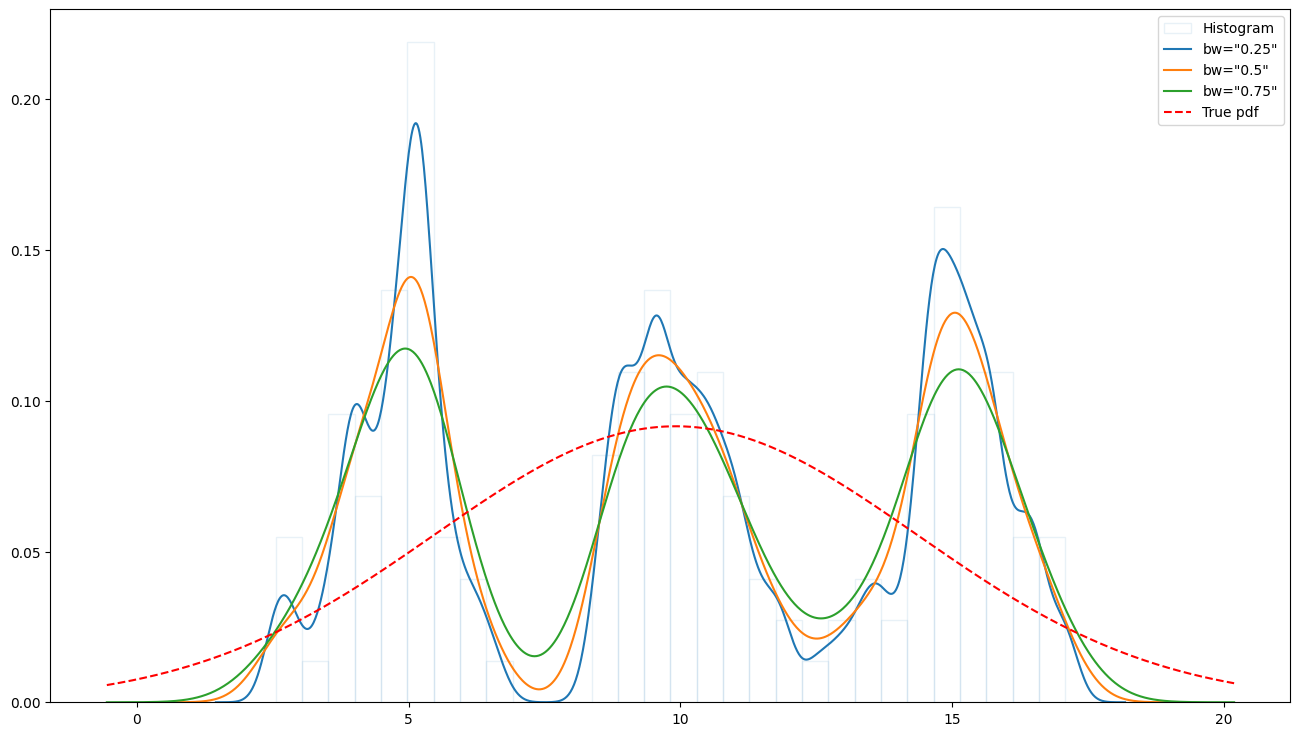

In [181]:
plt.figure(figsize=(16,9))
plt.hist(data_array, density=True, label='Histogram', edgecolor='#1f77b4', color='w', bins=30, alpha=0.1)

mu, std = norm.fit(data_array)
xmin, xmax = plt.xlim()
p1 = norm.pdf(x, mu, std)

for bw in [0.25, 0.5, 0.75]:
    x, y = KDEpy.FFTKDE(kernel='gaussian', bw=bw).fit(data_array).evaluate()
    plt.plot(x, y, label='bw="{}"'.format(bw))

plt.plot(x, p1, label='True pdf', c='r', ls='--')
plt.legend(loc='best');

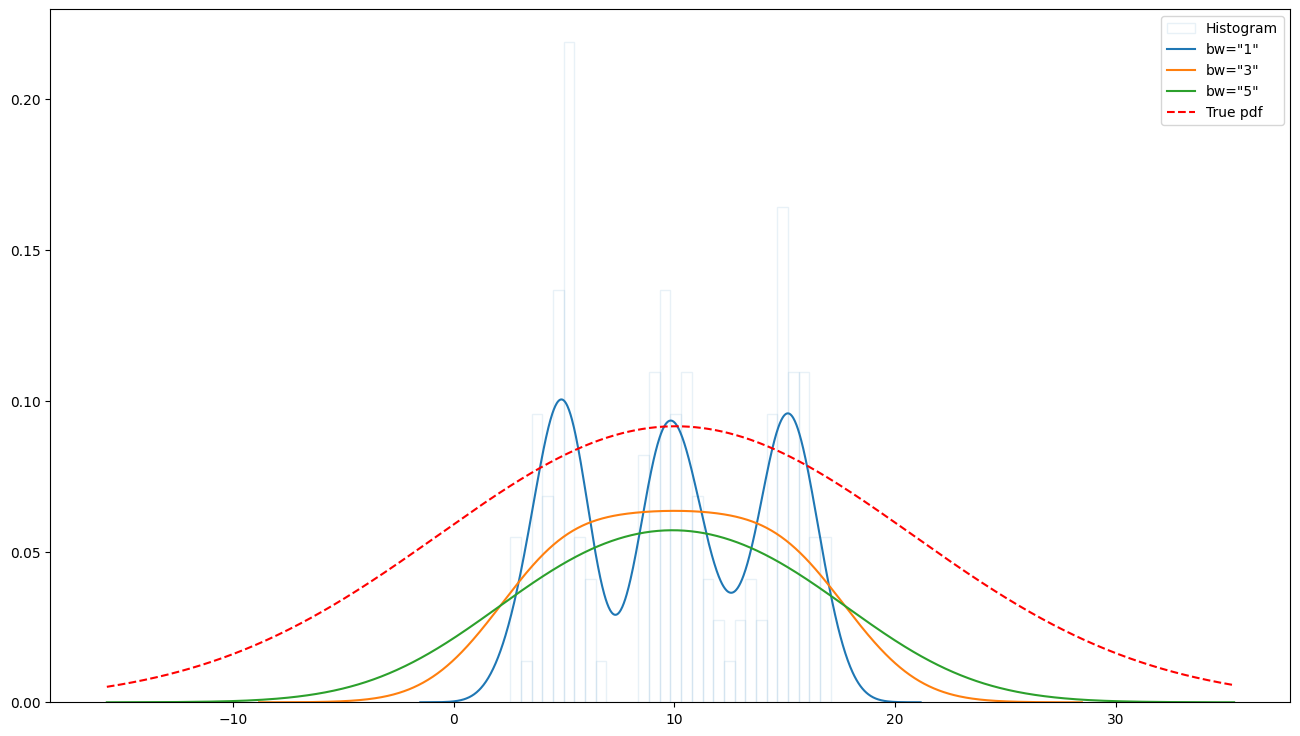

In [182]:
plt.figure(figsize=(16,9))
plt.hist(data_array, density=True, label='Histogram', edgecolor='#1f77b4', color='w', bins=30, alpha=0.1)

mu, std = norm.fit(data_array)
xmin, xmax = plt.xlim()
p1 = norm.pdf(x, mu, std)

for bw in [1, 3, 5]:
    x, y = KDEpy.FFTKDE(kernel='gaussian', bw=bw).fit(data_array).evaluate()
    plt.plot(x, y, label='bw="{}"'.format(bw))

plt.plot(x, p1, label='True pdf', c='r', ls='--')
plt.legend(loc='best');

# Gaussian Kernel - Play with weights

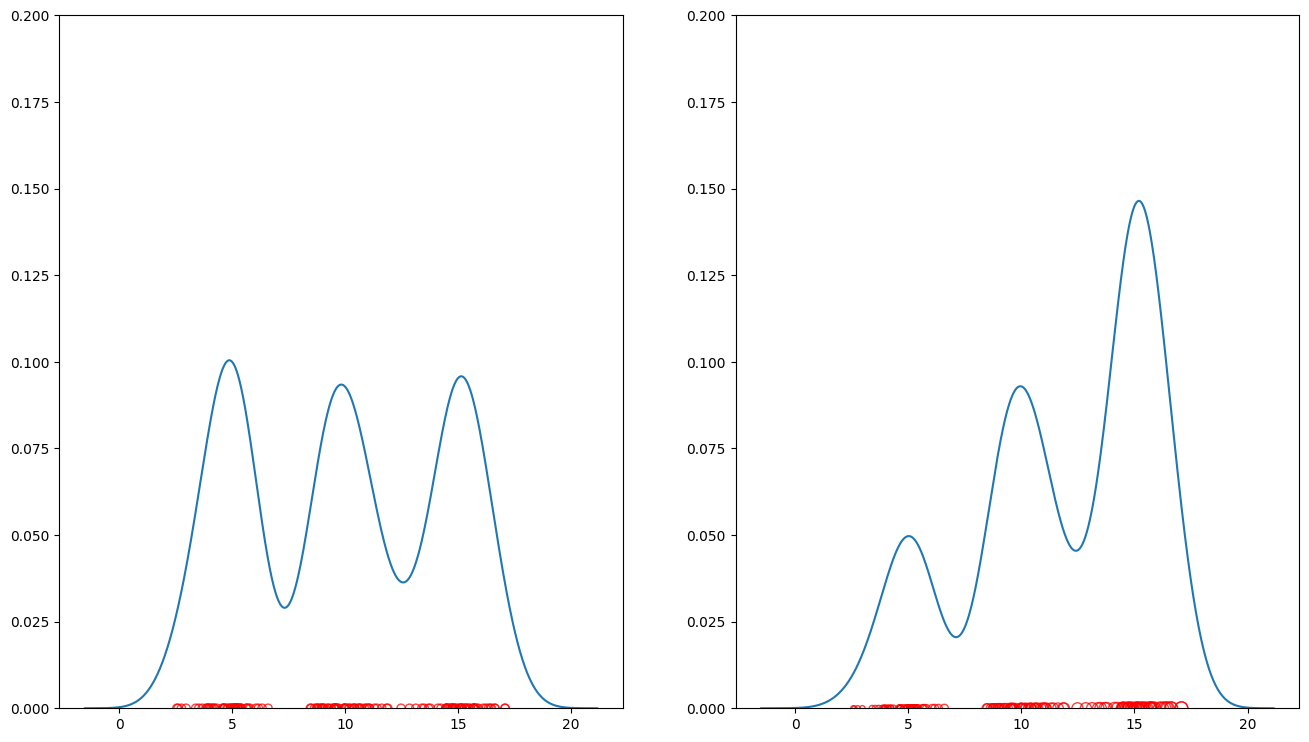

In [183]:
plt.figure(figsize=(16, 9)); plt.subplot(1, 2, 1)
plt.scatter(data_array, np.zeros_like(data_array), marker='o', c='None',
            edgecolor='r', alpha=0.75)

# Unweighted KDE
x, y = KDEpy.FFTKDE().fit(data_array)()
plt.plot(x, y)
plt.ylim([0,0.2])

plt.subplot(1, 2, 2); np.random.seed(123)
weights = data_array * 5
plt.scatter(data_array, np.zeros_like(data_array), marker='o', c='None',
            edgecolor='r', alpha=0.75, s=weights)

# Weighted KDE
x, y = KDEpy.FFTKDE().fit(data_array, weights=weights)()
plt.plot(x, y)
plt.ylim([0,0.2])
plt.show()
